## Import relevant libraries and functions

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pickle

from ema_workbench import (
    save_results,
    load_results,
    ema_logging
)
from SALib.analyze import sobol
from ema_workbench.em_framework.salib_samplers import get_SALib_problem

from problem_formulation import get_model_for_problem_formulation

## Prepare model and parameters

In [2]:
ema_logging.log_to_stderr(ema_logging.INFO)

# choose problem formulation number, between 0-5
# each problem formulation has its own list of outcomes
dike_model, planning_steps = get_model_for_problem_formulation(2)

# enlisting uncertainties, their types (RealParameter/IntegerParameter/CategoricalParameter), lower boundary, and upper boundary
import copy

for unc in dike_model.uncertainties:
    print(repr(unc))

uncertainties = copy.deepcopy(dike_model.uncertainties)

# enlisting policy levers, their types (RealParameter/IntegerParameter), lower boundary, and upper boundary
for policy in dike_model.levers:
    print(repr(policy))

levers = copy.deepcopy(dike_model.levers)

# enlisting outcomes
for outcome in dike_model.outcomes:
    print(repr(outcome))

CategoricalParameter('discount rate 0', [0, 1, 2, 3])
CategoricalParameter('discount rate 1', [0, 1, 2, 3])
CategoricalParameter('discount rate 2', [0, 1, 2, 3])
IntegerParameter('A.0_ID flood wave shape', 0, 132, resolution=None, default=None, variable_name=['A.0_ID flood wave shape'], pff=False)
RealParameter('A.1_Bmax', 30, 350, resolution=None, default=None, variable_name=['A.1_Bmax'], pff=False)
RealParameter('A.1_pfail', 0, 1, resolution=None, default=None, variable_name=['A.1_pfail'], pff=False)
CategoricalParameter('A.1_Brate', [0, 1, 2])
RealParameter('A.2_Bmax', 30, 350, resolution=None, default=None, variable_name=['A.2_Bmax'], pff=False)
RealParameter('A.2_pfail', 0, 1, resolution=None, default=None, variable_name=['A.2_pfail'], pff=False)
CategoricalParameter('A.2_Brate', [0, 1, 2])
RealParameter('A.3_Bmax', 30, 350, resolution=None, default=None, variable_name=['A.3_Bmax'], pff=False)
RealParameter('A.3_pfail', 0, 1, resolution=None, default=None, variable_name=['A.3_pfai

# Uncertainties

## Put experiments and outcomes in a dataframe

In [8]:
with open('experiments_SOBOL_10000xzero', 'rb') as file:
    experiments_unc = pickle.load(file)
    
with open('outcomes_SOBOL_10000xzero', 'rb') as file:
    outcomes_unc = pickle.load(file)

In [9]:
# Store all outcome names in a list
outcome_names_unc = list(outcomes_unc.keys())


## Analyse Sobol indices of non-lever related outcomes

In [10]:
problem_unc = get_SALib_problem(uncertainties)

results_dict_unc = {}

for outcome in [outcome_names_unc[i] for i in [0,4]]:
    # Perform the Sobol analysis for each outcome
    Si = sobol.analyze(problem_unc, outcomes_unc[outcome], calc_second_order=True, print_to_console=False)
    
    # Filter the results
    Si_filter = {k: Si[k] for k in ['ST', 'ST_conf', 'S1', 'S1_conf']}
    
    # Create a DataFrame from the filtered results
    Si_df = pd.DataFrame(Si_filter, index=problem_unc['names'])
    
    # Store the DataFrame in the results dictionary
    results_dict_unc[outcome] = Si_df

# Concatenate all the DataFrames in the results dictionary into a single DataFrame
# Use MultiIndex to handle multiple outcomes
final_df = pd.concat(results_dict_unc, axis=1)

# Display the final DataFrame
display(final_df)

C:\Users\Asus\Documents\Python venvs\MBDMv2\Lib\site-packages\SALib\util\__init__.py:274: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  names = list(pd.unique(groups))


Expected Annual Damage                          \
                                            ST       ST_conf        S1   
A.0_ID flood wave shape           4.803791e-03  2.560850e-04  0.001866   
A.1_Bmax                          1.472935e-02  1.421080e-03  0.004818   
A.1_Brate                         1.279983e-04  2.786898e-05  0.000017   
A.1_pfail                         7.086375e-01  1.382364e-02  0.654341   
A.2_Bmax                          5.694018e-04  1.320455e-04 -0.000019   
A.2_Brate                         2.031096e-05  5.789516e-06 -0.000083   
A.2_pfail                         2.414065e-02  9.530573e-04  0.012027   
A.3_Bmax                          1.678954e-04  3.201323e-05 -0.000009   
A.3_Brate                         1.004680e-05  2.894487e-06 -0.000020   
A.3_pfail                         2.481140e-01  5.581042e-03  0.202684   
A.4_Bmax                          1.429394e-05  5.845078e-06  0.000049   
A.4_Brate                         9.608075e-07  3.959851e-07 -0.000007   
A.4_pfail                         1.298367e-03  1.164193e-04  0.000031   
A.5_Bmax                          0.000000e+00  0.000000e+00  0.000000   
A.5_Brate                         0.000000e+00  0.000000e+00  0.000000   
A.5_pfail                         1.947813e-02  9.015487e-04  0.011610   
discount rate 0                   2.140296e-02  5.677899e-04  0.015221   
discount rate 1                   2.137489e-02  5.780964e-04  0.014625   
discount rate 2                   2.141821e-02  6.328708e-04  0.013285   

                                  Expected Number of Deaths                \
                          S1_conf                        ST       ST_conf   
A.0_ID flood wave shape  0.001275              7.829383e-03  3.795578e-04   
A.1_Bmax                 0.002409              3.636431e-02  2.947407e-03   
A.1_Brate                0.000260              3.291554e-04  7.170275e-05   
A.1_pfail                0.013856              2.855094e-01  6.255186e-03   
A.2_Bmax                 0.000348              1.332516e-03  4.433937e-04   
A.2_Brate                0.000080              3.935096e-05  1.673325e-05   
A.2_pfail                0.003141              2.953929e-02  2.216224e-03   
A.3_Bmax                 0.000245              1.311937e-04  2.584889e-05   
A.3_Brate                0.000057              7.426014e-06  2.253900e-06   
A.3_pfail                0.009778              7.947468e-01  1.512357e-02   
A.4_Bmax                 0.000072              1.168507e-05  4.463256e-06   
A.4_Brate                0.000020              9.389412e-07  4.780317e-07   
A.4_pfail                0.000732              1.143996e-03  1.039739e-04   
A.5_Bmax                 0.000000              0.000000e+00  0.000000e+00   
A.5_Brate                0.000000              0.000000e+00  0.000000e+00   
A.5_pfail                0.002556              1.526984e-02  7.177032e-04   
discount rate 0          0.002927              0.000000e+00  0.000000e+00   
discount rate 1          0.002992              0.000000e+00  0.000000e+00   
discount rate 2          0.002825              0.000000e+00  0.000000e+00   

                                             
                               S1   S1_conf  
A.0_ID flood wave shape  0.001851  0.001769  
A.1_Bmax                 0.007381  0.003903  
A.1_Brate               -0.000022  0.000330  
A.1_pfail                0.172251  0.009069  
A.2_Bmax                 0.000098  0.000533  
A.2_Brate               -0.000076  0.000111  
A.2_pfail                0.003112  0.002920  
A.3_Bmax                -0.000019  0.000206  
A.3_Brate               -0.000016  0.000054  
A.3_pfail                0.668144  0.017874  
A.4_Bmax                 0.000025  0.000064  
A.4_Brate               -0.000013  0.000022  
A.4_pfail               -0.000065  0.000646  
A.5_Bmax                 0.000000  0.000000  
A.5_Brate                0.000000  0.000000  
A.5_pfail                0.007628  0.002604  
discount rate 0        

## Visualise outcomes

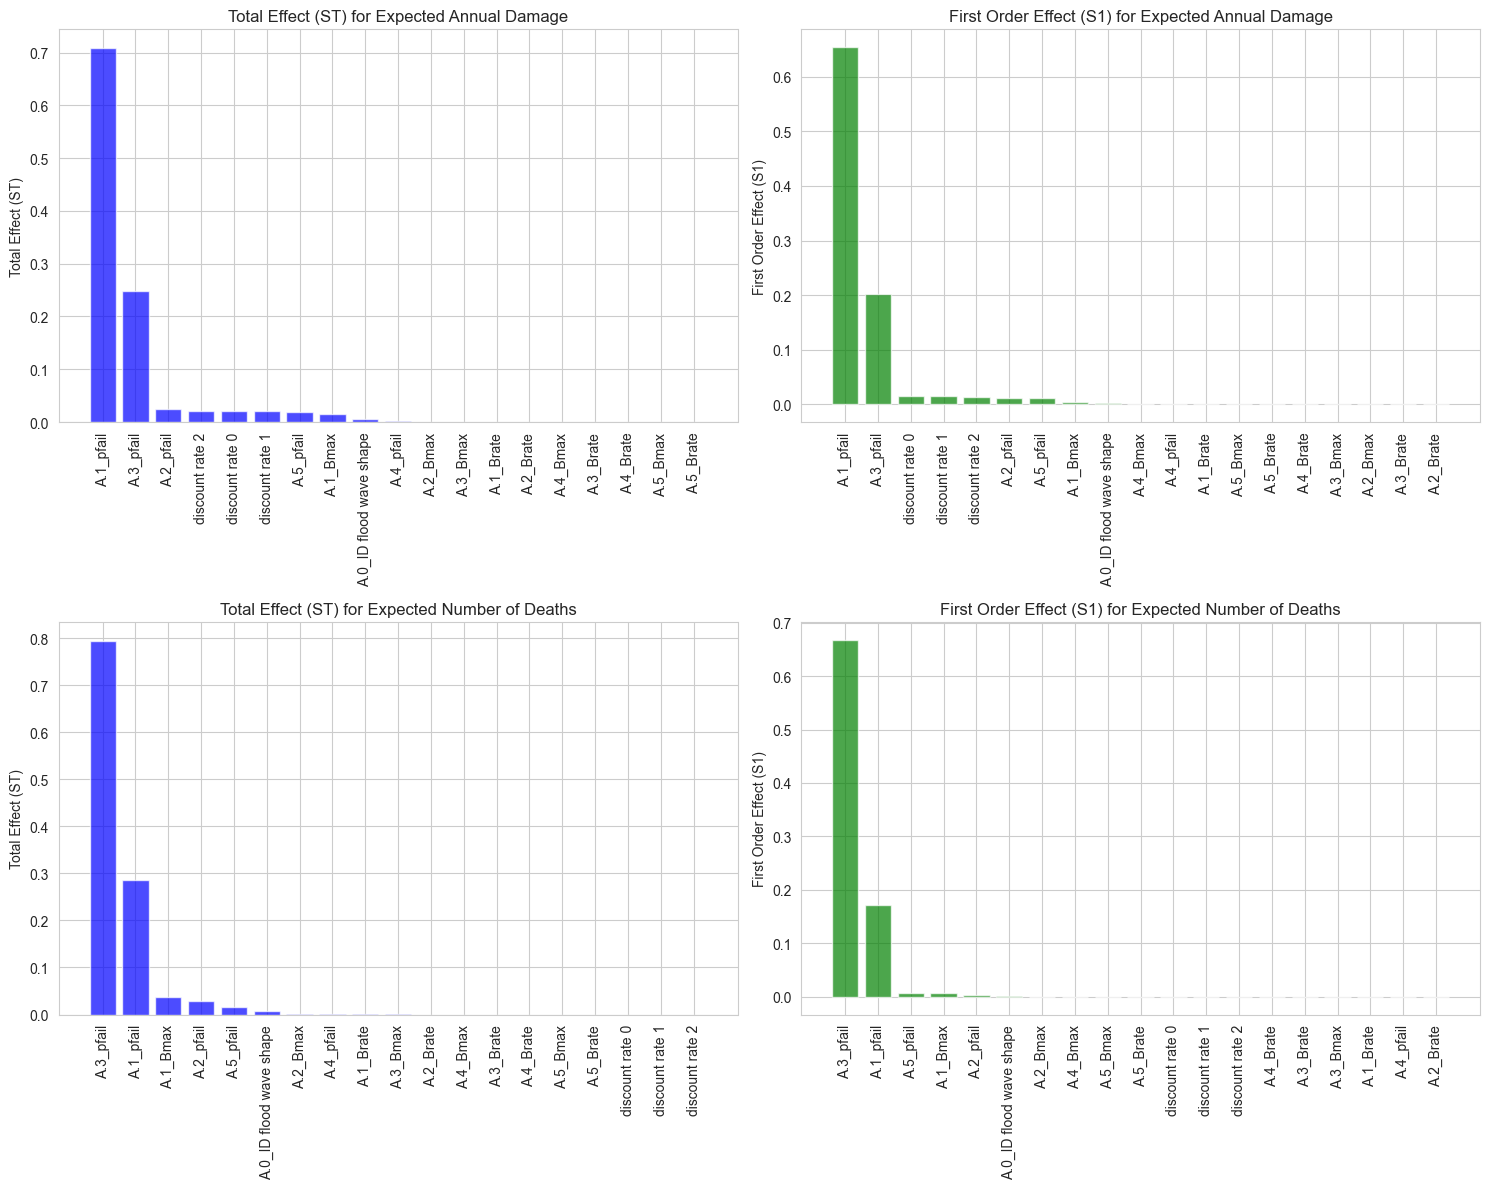

In [11]:
# Extract the unique outcomes from the columns of final_df
outcomes_unc = final_df.columns.get_level_values(0).unique()

# Set the style for seaborn
sns.set_style('whitegrid')

# Create subplots for each outcome
fig, axes = plt.subplots(nrows=len(outcomes_unc), ncols=2, figsize=(15, len(outcomes_unc) * 6))
fig.subplots_adjust(hspace=0.5)

# Iterate over each outcome and plot the ST and S1 values
for i, outcome in enumerate(outcomes_unc):
    # Extract the data for the current outcome
    st_data = final_df[outcome]['ST']
    s1_data = final_df[outcome]['S1']
    
    # Sort the data to identify the uncertainties with the highest effects
    st_sorted = st_data.sort_values(ascending=False)
    s1_sorted = s1_data.sort_values(ascending=False)
    
    # Plot the Total Effects (ST)
    axes[i, 0].bar(st_sorted.index, st_sorted.values, color='b', alpha=0.7)
    axes[i, 0].set_title(f'Total Effect (ST) for {outcome}')
    axes[i, 0].set_ylabel('Total Effect (ST)')
    axes[i, 0].tick_params(axis='x', rotation=90)
    
    # Plot the First Order Effects (S1)
    axes[i, 1].bar(s1_sorted.index, s1_sorted.values, color='g', alpha=0.7)
    axes[i, 1].set_title(f'First Order Effect (S1) for {outcome}')
    axes[i, 1].set_ylabel('First Order Effect (S1)')
    axes[i, 1].tick_params(axis='x', rotation=90)

# Adjust layout to prevent overlap
plt.tight_layout()
plt.show()

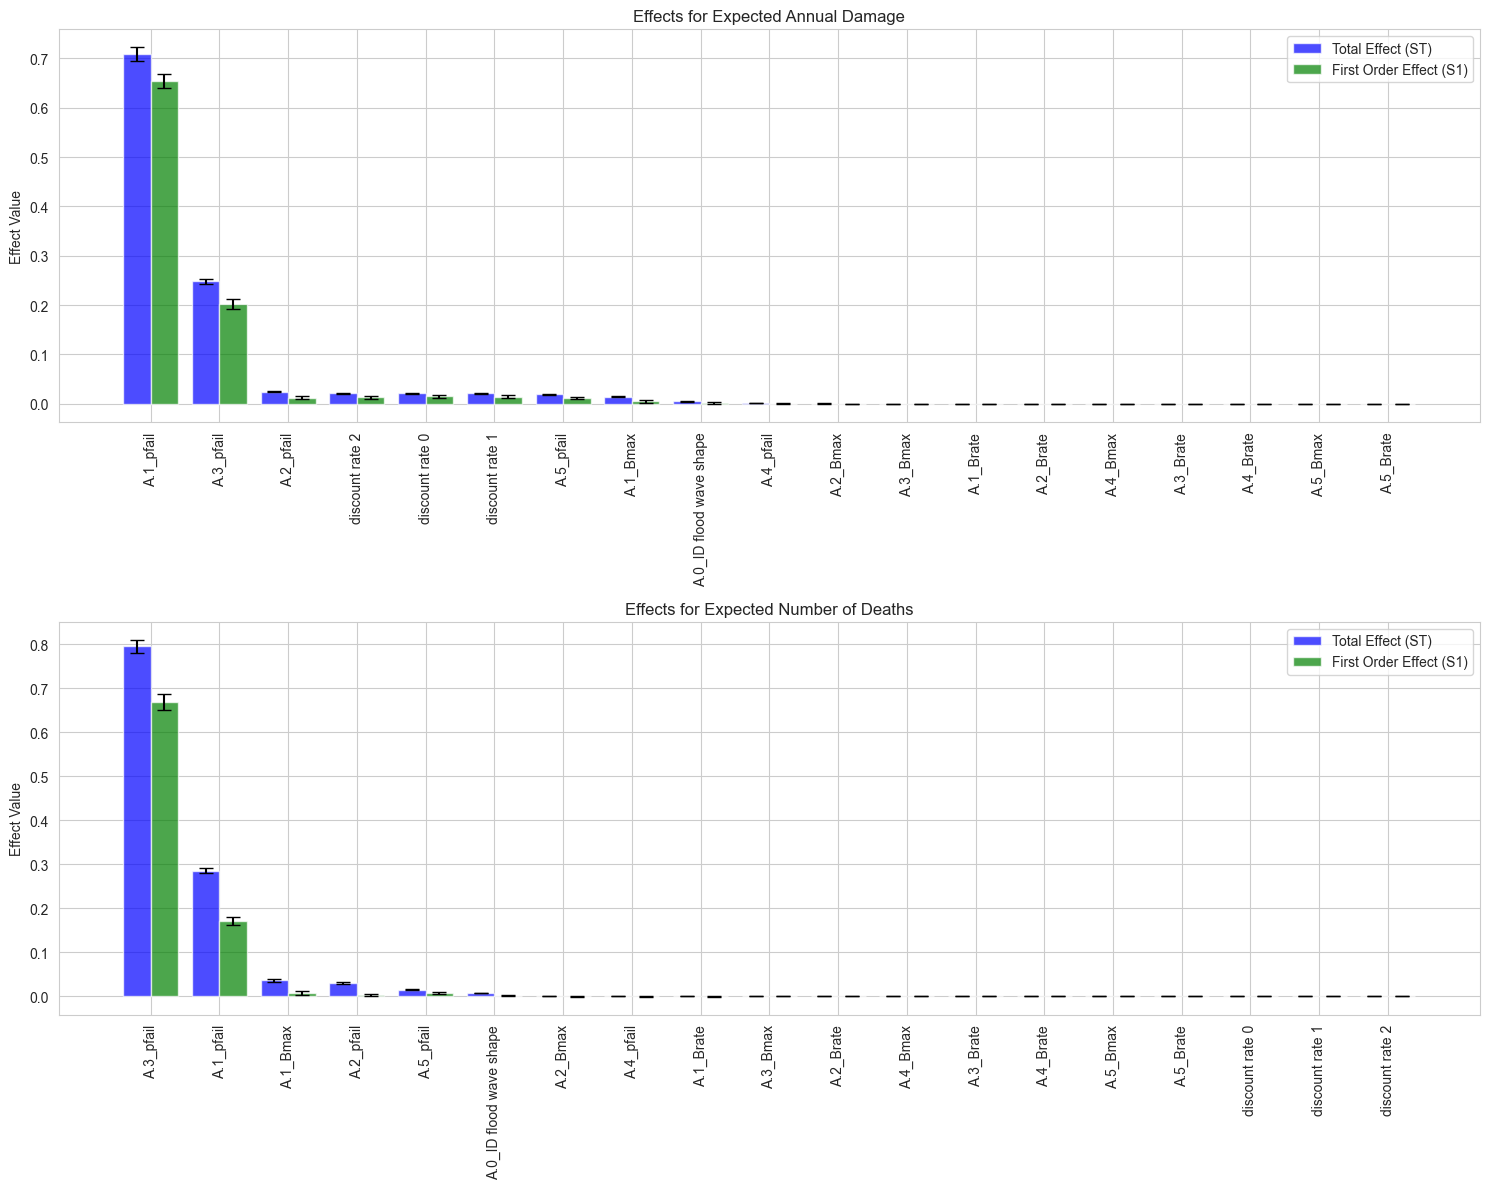

In [12]:
# Extract the unique outcomes from the columns of final_df
outcomes_unc = final_df.columns.get_level_values(0).unique()

# Set the style for seaborn
sns.set_style('whitegrid')

# Create subplots for each outcome
fig, axes = plt.subplots(nrows=len(outcomes_unc), ncols=1, figsize=(15, len(outcomes_unc) * 6))
fig.subplots_adjust(hspace=0.5)

# Define the width of the bars
bar_width = 0.4

# Iterate over each outcome and plot the ST and S1 values side by side
for i, outcome in enumerate(outcomes_unc):
    # Extract the data for the current outcome
    st_data = final_df[outcome]['ST']
    s1_data = final_df[outcome]['S1']
    st_conf = final_df[outcome]['ST_conf']
    s1_conf = final_df[outcome]['S1_conf']
    
    # Sort the data to identify the uncertainties with the highest effects
    indices = st_data.sort_values(ascending=False).index
    st_sorted = st_data.loc[indices]
    s1_sorted = s1_data.loc[indices]
    st_conf_sorted = st_conf.loc[indices]
    s1_conf_sorted = s1_conf.loc[indices]
    
    # Create the positions for the bars
    r1 = np.arange(len(st_sorted))
    r2 = [x + bar_width for x in r1]
    
    # Plot the Total Effects (ST) and First Order Effects (S1) side by side
    ax = axes[i] if len(outcomes_unc) > 1 else axes
    ax.bar(r1, st_sorted.values, yerr=st_conf_sorted.values, width=bar_width, label='Total Effect (ST)', color='b', alpha=0.7, capsize=5)
    ax.bar(r2, s1_sorted.values, yerr=s1_conf_sorted.values, width=bar_width, label='First Order Effect (S1)', color='g', alpha=0.7, capsize=5)
    
    # Set the labels and titles
    ax.set_title(f'Effects for {outcome}')
    ax.set_ylabel('Effect Value')
    ax.set_xticks([r + bar_width/2 for r in range(len(st_sorted))])
    ax.set_xticklabels(indices, rotation=90)
    ax.legend()

# Adjust layout to prevent overlap
plt.tight_layout()
plt.show()

# Levers

## Put experiments and outcomes in a dataframe

In [3]:
with open('experiments_SOBOL_refx20000', 'rb') as file:
    experiments_lev = pickle.load(file)
    
with open('outcomes_SOBOL_refx20000', 'rb') as file:
    outcomes_lev = pickle.load(file)

## Analyse Sobol indices of all outcomes

In [5]:
# Store all outcome names in a list
outcome_names_lev = list(outcomes_lev.keys())

problem_lev = get_SALib_problem(levers)

results_dict = {}

for outcome in outcome_names_lev:
    # Perform the Sobol analysis for each outcome
    Si = sobol.analyze(problem_lev, outcomes_lev[outcome], calc_second_order=True, print_to_console=False)
    
    # Filter the results
    Si_filter = {k: Si[k] for k in ['ST', 'ST_conf', 'S1', 'S1_conf']}
    
    # Create a DataFrame from the filtered results
    Si_df = pd.DataFrame(Si_filter, index=problem_lev['names'])
    
    # Store the DataFrame in the results dictionary
    results_dict[outcome] = Si_df

# Concatenate all the DataFrames in the results dictionary into a single DataFrame
# Use MultiIndex to handle multiple outcomes
final_df = pd.concat(results_dict, axis=1)

# Display the final DataFrame
display(final_df)

C:\Users\Asus\Documents\Python venvs\MBDMv2\Lib\site-packages\SALib\util\__init__.py:274: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  names = list(pd.unique(groups))


Expected Annual Damage                                \
                                       ST   ST_conf        S1   S1_conf   
0_RfR 0                          0.002276  0.001160  0.000034  0.000744   
0_RfR 1                          0.034551  0.021871  0.003388  0.006762   
0_RfR 2                          0.003034  0.001823 -0.000454  0.000716   
1_RfR 0                          0.043109  0.036647 -0.001934  0.002894   
1_RfR 1                          0.037971  0.026351 -0.000042  0.003292   
1_RfR 2                          0.052467  0.046592 -0.000114  0.004166   
2_RfR 0                          0.045186  0.005606  0.003874  0.005472   
2_RfR 1                          0.043886  0.005626  0.005371  0.005633   
2_RfR 2                          0.047141  0.005611  0.009360  0.006527   
3_RfR 0                          0.163069  0.017872  0.036433  0.010809   
3_RfR 1                          0.155713  0.014110  0.026710  0.009354   
3_RfR 2                          0.157769  0.017306  0.034009  0.009655   
4_RfR 0                          0.002268  0.000436  0.001826  0.001571   
4_RfR 1                          0.002342  0.000439  0.000391  0.001245   
4_RfR 2                          0.001614  0.000310 -0.000173  0.001085   
A.1_DikeIncrease 0               0.029022  0.014723  0.001870  0.005671   
A.1_DikeIncrease 1               0.000839  0.001087  0.000374  0.000497   
A.1_DikeIncrease 2               0.000140  0.000259  0.000074  0.000138   
A.2_DikeIncrease 0               0.096150  0.008738  0.055167  0.010282   
A.2_DikeIncrease 1               0.014263  0.002379  0.000312  0.002621   
A.2_DikeIncrease 2               0.001171  0.000361  0.000316  0.001141   
A.3_DikeIncrease 0               0.176469  0.020736  0.073301  0.013003   
A.3_DikeIncrease 1               0.021442  0.005294  0.001134  0.003731   
A.3_DikeIncrease 2               0.002833  0.001385  0.000445  0.000941   
A.4_DikeIncrease 0               0.006866  0.000893  0.000045  0.002677   
A.4_DikeIncrease 1               0.000597  0.000193  0.000310  0.000652   
A.4_DikeIncrease 2               0.000041  0.000022  0.000169  0.000188   
A.5_DikeIncrease 0               0.545194  0.045434  0.264727  0.030716   
A.5_DikeIncrease 1               0.080230  0.015071  0.005496  0.005505   
A.5_DikeIncrease 2               0.005860  0.002977  0.000806  0.001432   
EWS_DaysToThreat                 0.000000  0.000000  0.000000  0.000000   

                   Dike Investment Costs                                \
                                      ST   ST_conf        S1   S1_conf   
0_RfR 0                         0.000000  0.000000  0.000000  0.000000   
0_RfR 1                         0.000000  0.000000  0.000000  0.000000   
0_RfR 2                         0.000000  0.000000  0.000000  0.000000   
1_RfR 0                         0.000000  0.000000  0.000000  0.000000   
1_RfR 1                         0.000000  0.000000  0.000000  0.000000   
1_RfR 2                         0.000000  0.000000  0.000000  0.000000   
2_RfR 0                         0.000000  0.000000  0.000000  0.000000   
2_RfR 1                         0.000000  0.000000  0.000000  0.000000   
2_RfR 2                         0.000000  0.000000  0.000000  0.000000   
3_RfR 0                         0.000000  0.000000  0.000000  0.000000   
3_RfR 1                         0.000000  0.000000  0.000000  0.000000   
3_RfR 2                         0.000000  0.000000  0.000000  0.000000   
4_RfR 0                         0.000000  0.000000  0.000000  0.000000   
4_RfR 1                         0.000000  0.000000  0.000000  0.000000   
4_RfR 2                         0.000000  0.000000  0.000000  0.000000   
A.1_DikeIncrease 0              0.137910  0.003785  0.135005  0.009917   
A.1_DikeIncrease 1              0.125605  0.003856  0.123768  0.010351   
A.1_DikeIncrease 2              0.111514  0.003720  0.109390  0.009517   
A.2_DikeIncrease 0              0.151721  0.004920  0.146662  0

## Visualise outcomes

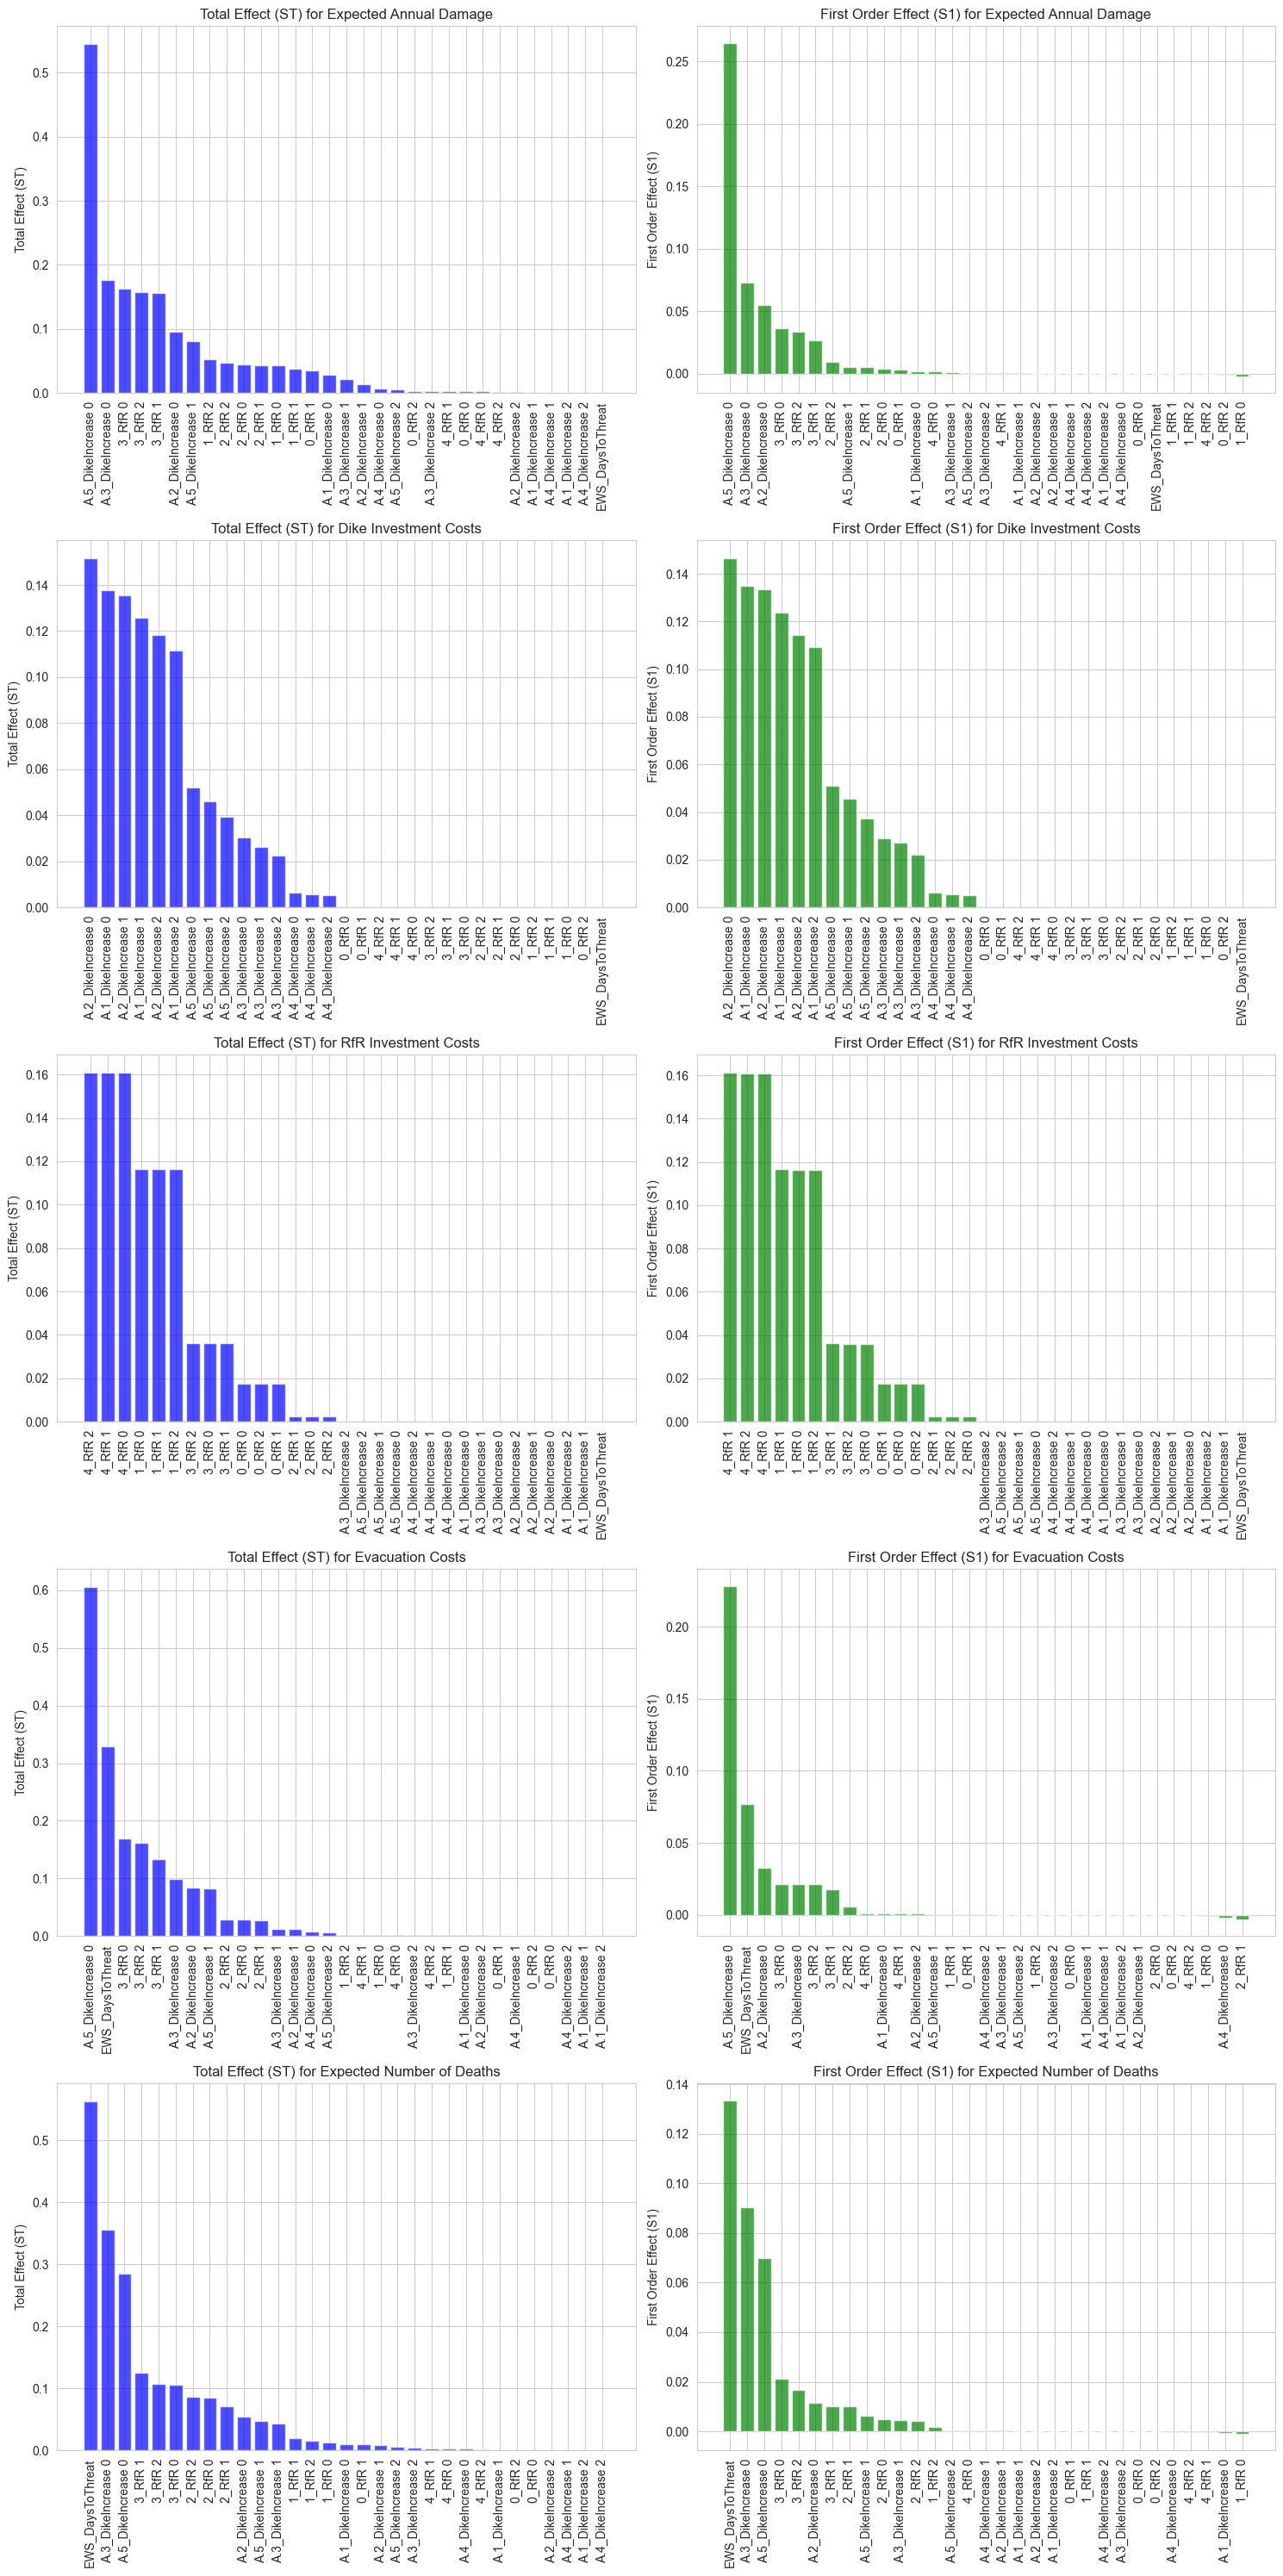

In [6]:
# Extract the unique outcomes from the columns of final_df
outcomes_lev = final_df.columns.get_level_values(0).unique()

# Set the style for seaborn
sns.set_style('whitegrid')

# Create subplots for each outcome
fig, axes = plt.subplots(nrows=len(outcomes_lev), ncols=2, figsize=(15, len(outcomes_lev) * 6))
fig.subplots_adjust(hspace=0.5)

# Iterate over each outcome and plot the ST and S1 values
for i, outcome in enumerate(outcomes_lev):
    # Extract the data for the current outcome
    st_data = final_df[outcome]['ST']
    s1_data = final_df[outcome]['S1']
    
    # Sort the data to identify the levers with the highest effects
    st_sorted = st_data.sort_values(ascending=False)
    s1_sorted = s1_data.sort_values(ascending=False)
    
    # Plot the Total Effects (ST)
    axes[i, 0].bar(st_sorted.index, st_sorted.values, color='b', alpha=0.7)
    axes[i, 0].set_title(f'Total Effect (ST) for {outcome}')
    axes[i, 0].set_ylabel('Total Effect (ST)')
    axes[i, 0].tick_params(axis='x', rotation=90)
    
    # Plot the First Order Effects (S1)
    axes[i, 1].bar(s1_sorted.index, s1_sorted.values, color='g', alpha=0.7)
    axes[i, 1].set_title(f'First Order Effect (S1) for {outcome}')
    axes[i, 1].set_ylabel('First Order Effect (S1)')
    axes[i, 1].tick_params(axis='x', rotation=90)

# Adjust layout to prevent overlap
plt.tight_layout()
plt.show()

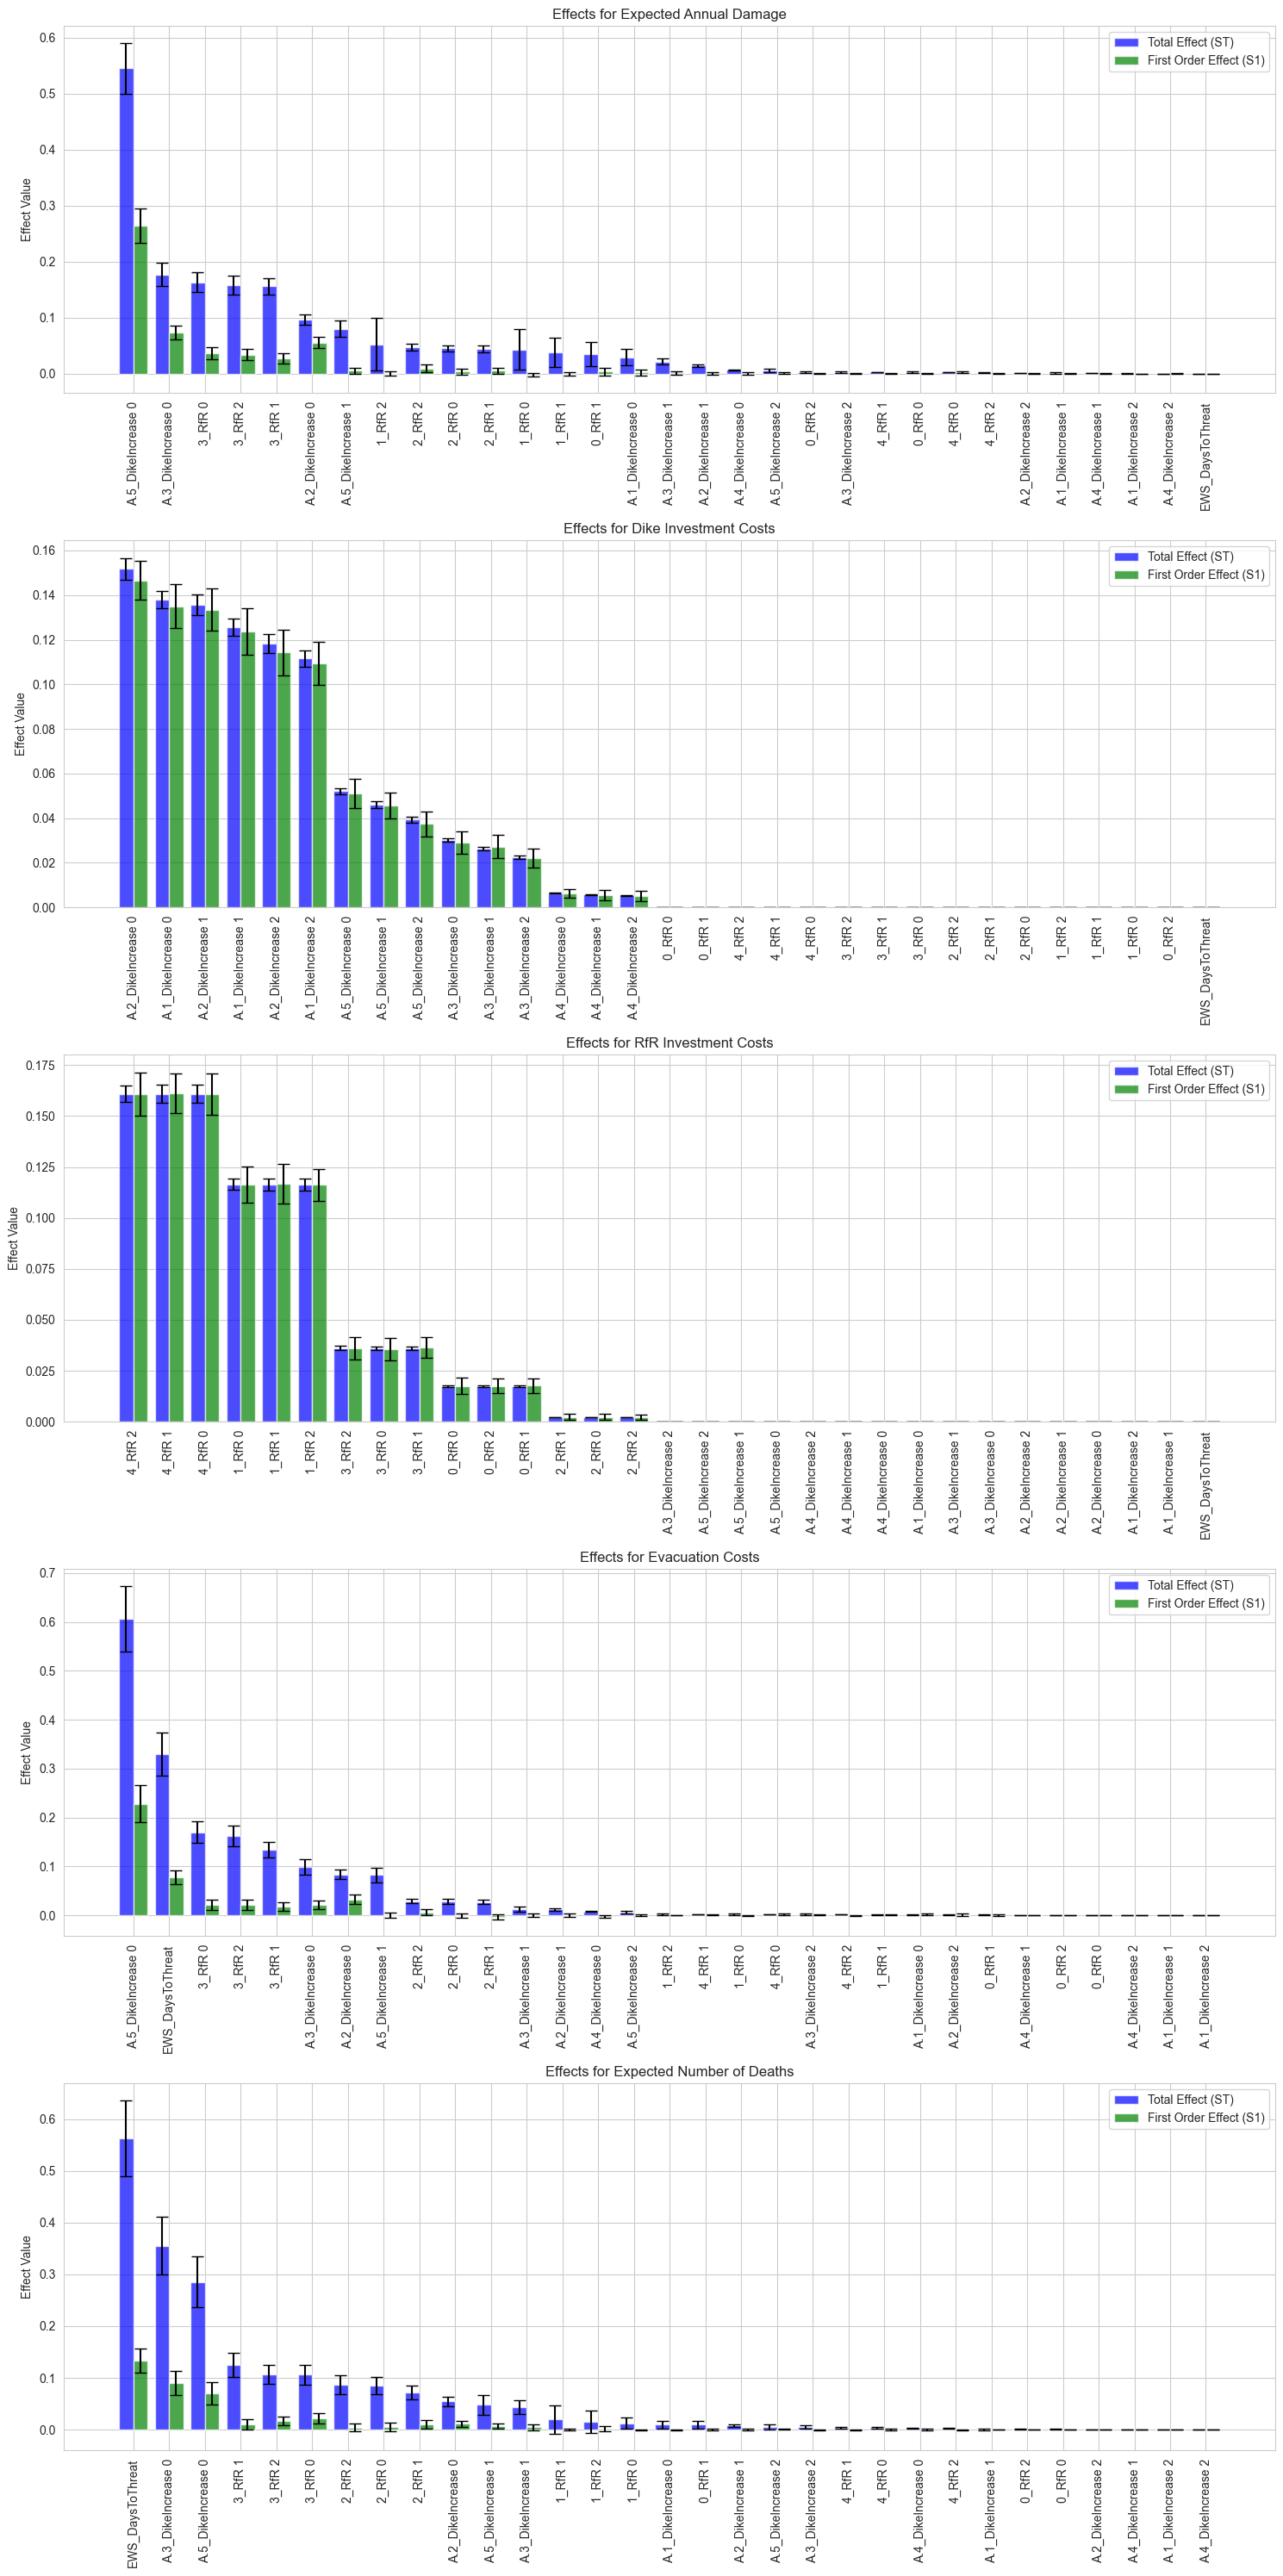

In [7]:
# Extract the unique outcomes from the columns of final_df
outcomes_lev = final_df.columns.get_level_values(0).unique()

# Set the style for seaborn
sns.set_style('whitegrid')

# Create subplots for each outcome
fig, axes = plt.subplots(nrows=len(outcomes_lev), ncols=1, figsize=(15, len(outcomes_lev) * 6))
fig.subplots_adjust(hspace=0.5)

# Define the width of the bars
bar_width = 0.4

# Iterate over each outcome and plot the ST and S1 values side by side
for i, outcome in enumerate(outcomes_lev):
    # Extract the data for the current outcome
    st_data = final_df[outcome]['ST']
    s1_data = final_df[outcome]['S1']
    st_conf = final_df[outcome]['ST_conf']
    s1_conf = final_df[outcome]['S1_conf']
    
    # Sort the data to identify the levers with the highest effects
    indices = st_data.sort_values(ascending=False).index
    st_sorted = st_data.loc[indices]
    s1_sorted = s1_data.loc[indices]
    st_conf_sorted = st_conf.loc[indices]
    s1_conf_sorted = s1_conf.loc[indices]
    
    # Create the positions for the bars
    r1 = np.arange(len(st_sorted))
    r2 = [x + bar_width for x in r1]
    
    # Plot the Total Effects (ST) and First Order Effects (S1) side by side
    ax = axes[i] if len(outcomes_lev) > 1 else axes
    ax.bar(r1, st_sorted.values, yerr=st_conf_sorted.values, width=bar_width, label='Total Effect (ST)', color='b', alpha=0.7, capsize=5)
    ax.bar(r2, s1_sorted.values, yerr=s1_conf_sorted.values, width=bar_width, label='First Order Effect (S1)', color='g', alpha=0.7, capsize=5)
    
    # Set the labels and titles
    ax.set_title(f'Effects for {outcome}')
    ax.set_ylabel('Effect Value')
    ax.set_xticks([r + bar_width/2 for r in range(len(st_sorted))])
    ax.set_xticklabels(indices, rotation=90)
    ax.legend()

# Adjust layout to prevent overlap
plt.tight_layout()
plt.show()